# Pymaceuticals Inc.
---

### Analysis

- Ketapril had the largest Tumor Volume mm3
    - Ketapril had the laregst median, mean, std, var, and sem
- Ramicane had the smallest Tumor Volume mm3
    - Ramicane had the smallest mean, median, var, std, and sem
- There were slightly more male mice at 51% to female mice at 49%
- Capomulin tested the laregest number of mice
- Ifubinal and Ceftamin had the largest final tumor volumes 
 

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
total_data = pd.merge(study_results, mouse_metadata, how="left", on = "Mouse ID")

# Display the data table for preview
total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [100]:
# Checking the number of mice.
mice_data = total_data["Mouse ID"].unique()
number_of_mice = len(mice_data)
number_of_mice

249

In [101]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dupes = total_data[total_data[["Mouse ID", "Timepoint"]].duplicated() == True]
mice_dupes_id = mice_dupes["Mouse ID"].unique()
mice_dupes_id

array(['g989'], dtype=object)

In [78]:
# Optional: Get all the data for the duplicate mouse ID. 


In [102]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_total_data=total_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_total_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [103]:
# Checking the number of mice in the clean DataFrame.
clean_mice_data = clean_total_data["Mouse ID"].unique()
clean_number_of_mice = len(clean_mice_data)
clean_number_of_mice

249

## Summary Statistics

In [104]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drug_reg_data = clean_total_data.set_index(["Drug Regimen"])
group_drug_data = drug_reg_data.groupby("Drug Regimen")
drug_reg_mean = group_drug_data["Tumor Volume (mm3)"].mean()
drug_reg_median = group_drug_data["Tumor Volume (mm3)"].median()
drug_reg_var = group_drug_data["Tumor Volume (mm3)"].var()
drug_reg_std = group_drug_data["Tumor Volume (mm3)"].std()
drug_reg_sem = group_drug_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
drug_reg_sum_df  = pd.DataFrame({"Mean Tumor Volume":  drug_reg_mean,
                                 "Median Tumor Volume":  drug_reg_median,
                                 "Tumor Volume Variance":  drug_reg_var,
                                 "Tumor Volume Std. Dev.":  drug_reg_std,
                                 "Tumor Volume Std. Err.":  drug_reg_sem})

In [105]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_reg_sum_df = drug_reg_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_reg_sum_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

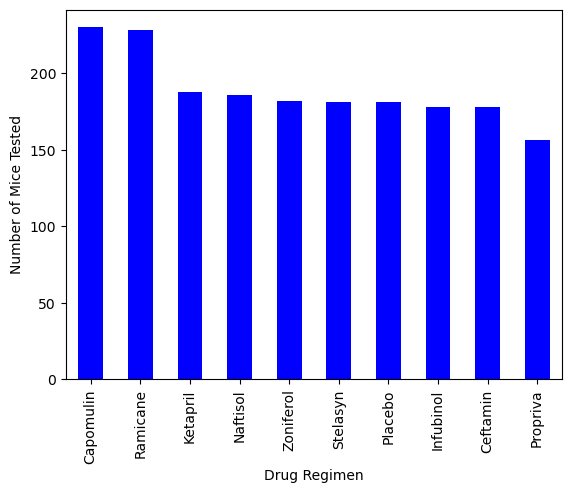

In [106]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_and_drugs = clean_total_data[["Drug Regimen","Timepoint"]]

mice_per_drug = mice_and_drugs["Drug Regimen"].value_counts()
mice_per_drug


mice_per_drug.plot(kind="bar",color = "b",
                  xlabel="Drug Regimen",
                  ylabel="Number of Mice Tested")

plt.show()

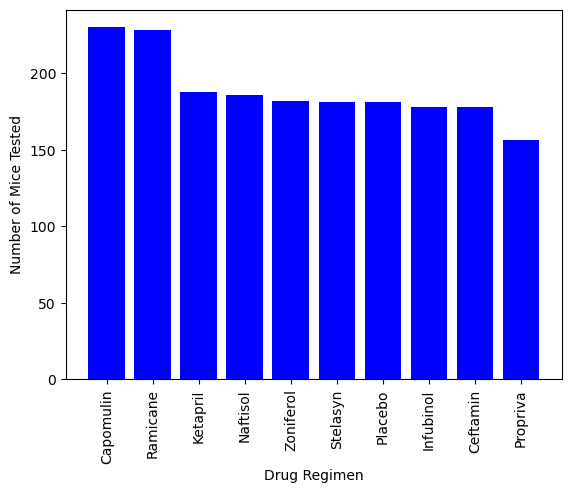

In [107]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs = mice_per_drug.index.values
count = mice_per_drug.values

plt.bar(drugs, count, color="b", align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=90)
plt.show()

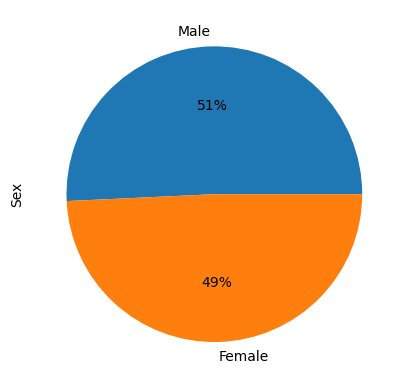

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_v_female = clean_total_data["Sex"].value_counts()
Sex = ["Male", "Female"]
male_v_female.plot(kind = "pie" , autopct="%1.0f%%", ylabel = "Sex")
plt.show()

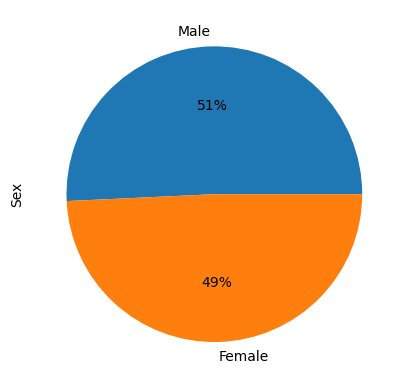

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_label = male_v_female.index.values
count_value = male_v_female.values
plt.ylabel("Sex")
plt.pie(count_value, labels = sex_label, autopct="%1.0f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [110]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_drug_data = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") | (clean_total_data["Drug Regimen"] == "Ramicane") |
                                        (clean_total_data["Drug Regimen"] == "Infubinol") |(clean_total_data["Drug Regimen"] == "Ceftamin") ]

# Start by getting the last (greatest) timepoint for each mouse
last_tp = reduced_drug_data.groupby(["Drug Regimen","Mouse ID"]).last()
new_last_tp = last_tp.reset_index()

reduced_last_tp=new_last_tp[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = reduced_last_tp.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [111]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for drug in reduced_last_tp["Drug Regimen"]:
    if drug not in treatment:
        treatment.append(drug)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tum_vol = []
upperq_list = []
lowerq_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = new_df[drug].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
drug_iqr = upperq-lowerq
    
    #list containing upper and lower quartiles of drug final timor volume 
upperq_list.append(upperq)
lowerq_list.append(lowerq)
print(f"iqr for {drug}: {drug_iqr}")
    
upperq_list   
lowerq_list

    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
# for row in 
#     capomulin_df

iqr for Ramicane: 9.098536719999998


NameError: name 'iqr' is not defined

Text(0.5, 0, '')

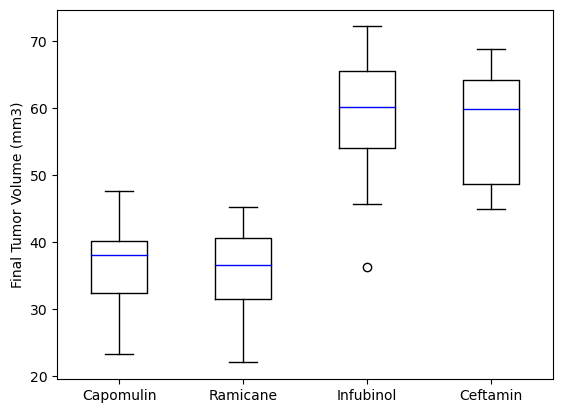

In [112]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot = new_df.boxplot(grid = False, color = dict(boxes = 'k', whiskers='k', medians='b'))
boxplot.set_ylabel('Final Tumor Volume (mm3)')
boxplot.set_xlabel('')

## Line and Scatter Plots

In [113]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin") & (clean_total_data["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

In [114]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_total_data.loc[(clean_total_data["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

## Correlation and Regression

In [115]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr (weight,avg_tumor_vol )

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values=capomulin_avg_df["Weight (g)"]
y_values=capomulin_avg_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avg_tumor_vol)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

NameError: name 'weight' is not defined